In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_Train, Y_Train), (X_Test, Y_Test) = datasets.cifar10.load_data()

In [5]:
X_Train.shape

(50000, 32, 32, 3)

In [7]:
X_Test.shape

(10000, 32, 32, 3)

In [9]:
X_Train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
X_Train[0].shape

(32, 32, 3)

In [13]:
Y_Train.shape

(50000, 1)

In [15]:
Y_Train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
#Flatten the 2D Matrix
Y_Train = Y_Train.reshape(-1, )
Y_Test = Y_Test.reshape(-1, )
print(Y_Train[:6])
print(Y_Test[:6])

[6 9 9 4 1 1]
[3 8 8 0 6 6]


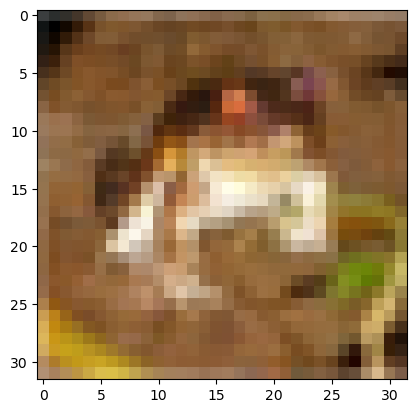

In [23]:
plt.imshow(X_Train[0])

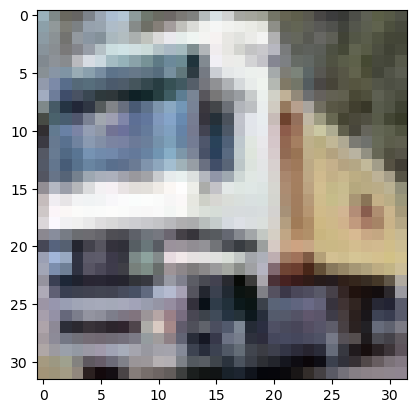

In [25]:
plt.imshow(X_Train[1])

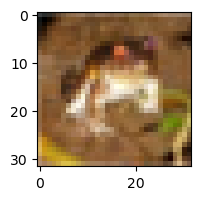

In [27]:
#Resize image
plt.figure(figsize = (15, 2))
plt.imshow(X_Train[0])

In [29]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [31]:
classes[9]

'truck'

In [33]:
#For quick data exploration:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

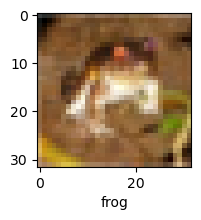

In [35]:
plot_sample(X_Train, Y_Train, 0)

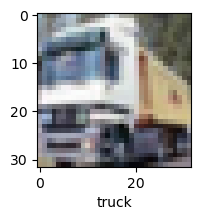

In [37]:
plot_sample(X_Train, Y_Train, 1)

In [39]:
Y_Test[:5]  #Must be 2D

array([3, 8, 8, 0, 6], dtype=uint8)

In [41]:
#Turns out the X and Y are corresponding, even Test ones

In [43]:
#Now, we normalize our data

In [45]:
X_Train = X_Train/255.0
X_Test = X_Test/255.0

In [47]:
#Simple Artifical Neural Network:

In [49]:
ANN = models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),  #Gives warnings
    tf.keras.layers.Dense(3000, activation = 'relu'),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'softmax')])

ANN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
                          

C:\Users\ashut\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
ANN.fit(X_Train, Y_Train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2767 - loss: 2.0639
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4017 - loss: 1.6875
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4417 - loss: 1.5846
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4653 - loss: 1.5127
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4892 - loss: 1.4530


In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_Pred = ANN.predict(X_Test)
Y_Pred_Classes = [np.argmax(element) for element in Y_Pred]

print("Classification Report: \n", classification_report(Y_Test, Y_Pred_Classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.51      0.52      1000
           1       0.71      0.43      0.54      1000
           2       0.45      0.21      0.29      1000
           3       0.42      0.12      0.19      1000
           4       0.48      0.36      0.41      1000
           5       0.32      0.57      0.41      1000
           6       0.47      0.63      0.54      1000
           7       0.45      0.62      0.52      1000
           8       0.52      0.71      0.60      1000
           9       0.55      0.56      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [55]:
print(Y_Pred[:5])  # Predicted probabilities
print(Y_Pred_Classes[:5])  # Predicted class labels
print(Y_Test[:5])  # True class labels

[[1.85991228e-02 2.06634048e-02 1.06320471e-01 2.81523794e-01
  4.36276086e-02 2.50158995e-01 2.18536392e-01 4.75962041e-03
  4.87434641e-02 5.26704034e-03 3.17519771e-05 2.48638698e-05
  1.82704389e-05 2.35505413e-05 2.43517934e-05 2.38293287e-05
  1.88197791e-05 2.23124989e-05 2.49386521e-05 2.74406539e-05
  2.38791490e-05 2.58974196e-05 2.41144498e-05 1.75580990e-05
  1.72167365e-05 1.74068118e-05 1.37370780e-05 7.41498798e-06
  1.47291767e-05 1.64489884e-05 2.71223034e-05 1.25744555e-05
  1.37909101e-05 1.71932752e-05 2.47813005e-05 1.56966325e-05
  3.13239543e-05 1.71720039e-05 1.81855903e-05 1.87422611e-05
  2.47899970e-05 2.23090319e-05 2.29143880e-05 1.65738729e-05
  2.18262903e-05 2.06697987e-05 1.54670633e-05 1.93512788e-05
  1.96062174e-05 1.86582092e-05 1.96860692e-05 1.89699185e-05
  1.43233965e-05 1.20741115e-05 2.85429087e-05 2.10054368e-05
  2.97175393e-05 1.22035699e-05 1.36128856e-05 2.58971013e-05
  2.12073446e-05 1.59131632e-05 9.46125783e-06 1.08523527e-05
  1.2527

In [85]:
#Now let us use CNN to improve performance of model

In [57]:
CNN = models.Sequential([
    #CNN Layer
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),
        
    #Dense Layer, no need to specify space in middle layer
    layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])  #Softmax layer will normalize probability

C:\Users\ashut\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
'''
Sigmoid:
Class 1: 0.45
Class 2: 0.67

Softmax:
Class 1: (0.45)/(0.45 + 0.67)
Class 2: (0.67)/(0.45 + 0.67)

Sum always 1 of softmax
'''

'\nSigmoid:\nClass 1: 0.45\nClass 2: 0.67\n\nSoftmax:\nClass 1: (0.45)/(0.45 + 0.67)\nClass 2: (0.67)/(0.45 + 0.67)\n\nSum always 1 of softmax\n'

In [61]:
CNN.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [63]:
CNN.fit(X_Train, Y_Train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3867 - loss: 1.6790
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5905 - loss: 1.1596
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6548 - loss: 0.9982
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6899 - loss: 0.8926
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7119 - loss: 0.8366
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7341 - loss: 0.7696
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7507 - loss: 0.7221
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7669 - loss: 0.6745
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7801 - loss: 0.6336
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7919 - loss: 0.5955


In [65]:
CNN.evaluate(X_Test, Y_Test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7019 - loss: 0.9249


[0.9477341771125793, 0.6959999799728394]

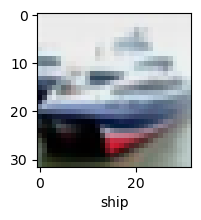

In [67]:
plot_sample(X_Test, Y_Test, 1)

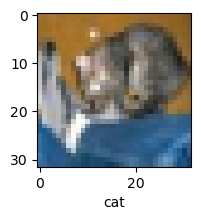

In [69]:
plot_sample(X_Test, Y_Test, 0)

In [63]:
#Now let's use the model to predict this and see how it performs

In [71]:
Y_Pred = CNN.predict(X_Test)
Y_Pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.36846509e-02, 7.38461495e-07, 1.75051950e-02, 7.91503727e-01,
        2.34308792e-03, 8.62468854e-02, 3.26175690e-02, 1.85988916e-04,
        5.56610674e-02, 2.51099525e-04],
       [4.86030243e-04, 2.91538369e-02, 4.61287054e-05, 1.76642217e-07,
        9.76841150e-08, 5.33202238e-09, 3.35612294e-09, 1.28130502e-08,
        9.69316781e-01, 9.96952178e-04],
       [1.96792856e-01, 1.02702625e-01, 3.43925646e-03, 1.84026975e-02,
        2.98790657e-03, 7.76545436e-04, 2.85535090e-04, 6.08571060e-03,
        6.33418798e-01, 3.51081565e-02],
       [9.10765767e-01, 2.84313154e-03, 1.71922392e-03, 1.81774376e-04,
        3.50813323e-04, 2.68324061e-06, 2.33213013e-05, 3.72730610e-05,
        8.37404430e-02, 3.35637422e-04],
       [3.58751606e-09, 5.25136466e-06, 2.03920063e-03, 2.68185325e-02,
        2.72246692e-02, 3.95294046e-04, 9.43516910e-01, 1.75834263e-08,
        5.90485278e-08, 4.10389447e-08]], dtype=float32)

In [73]:
#Values in each of these elements are probability distribution between zero and one. It's
#using SoftMax

In [75]:
np.argmax([5, 12, 18])

2

In [77]:
np.argmax(Y_Pred[0])

3

In [79]:
Y_Classes = [np.argmax(element) for element in Y_Pred]
Y_Classes[:5]

[3, 8, 8, 0, 6]

In [81]:
Y_Test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [83]:
#Okay so it prdicted first one as a cat correctly

In [85]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

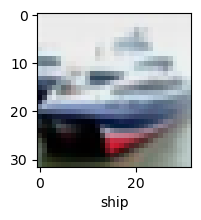

In [87]:
plot_sample(X_Test, Y_Test, 1)

In [89]:
classes[Y_Classes[1]]

'ship'

In [91]:
#Again correctly predicted ship

In [93]:
print("Classification Report: \n", classification_report(Y_Test, Y_Classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      1000
           1       0.82      0.80      0.81      1000
           2       0.57      0.65      0.61      1000
           3       0.54      0.44      0.49      1000
           4       0.65      0.63      0.64      1000
           5       0.65      0.51      0.57      1000
           6       0.63      0.87      0.73      1000
           7       0.78      0.72      0.75      1000
           8       0.83      0.77      0.80      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [95]:
#Better numbers. CNN also has less computation due to maxPooling